In [371]:
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image

In [372]:
img = Image.open('D:/2.png')
image = np.array(img)
image = image.astype(np.uint16)
height = len(img.size)
width = img.size[0]
image.shape

(512, 512, 3)

In [407]:
def show_img(image, new_img, func1, another_img = None, func2 = None):
    if np.any(another_img) == None and func2 == None:
        fig, axs = plt.subplots(1, 2, figsize=(14, 7))
        
        axs[0].set_title("Original Image")
        axs[0].imshow(image)
        axs[0].axis('off')
        
        axs[1].set_title(func1 + " Image")
        axs[1].imshow(new_img, 'gray')
        axs[1].axis('off')
    
    else:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        
        axs[0].set_title("Original Image")
        axs[0].imshow(image)
        axs[0].axis('off')
        
        axs[1].set_title(func1 + " Image")
        axs[1].imshow(new_img, 'gray')
        axs[1].axis('off')
        
        axs[2].set_title(func2 + " Image")
        axs[2].imshow(another_img, 'gray')
        axs[2].axis('off')
    
    plt.show()

In [374]:
def export_img(new_img, func):
    new_img = Image.fromarray(new_img.astype(np.uint8))
    output = 'output_' + str(func) + '.jpg'
    new_img.save(output) 

In [375]:
def int2float_image(image):
    img = image.astype(float)
    img /= np.max(image)
    return img, np.max(image)

In [376]:
def float2int_image(image, img_max):
    return image * img_max

In [377]:
def rgb2gray(image):
    img, img_max = int2float_image(image)
    gray_filter = np.array([0.29, 0.59, 0.11])
    gray_img = np.dot(img[...,:3], gray_filter)
    gray_img = np.clip(gray_img, 0 , 1)
    return float2int_image(gray_img, img_max)

0.016953229904174805


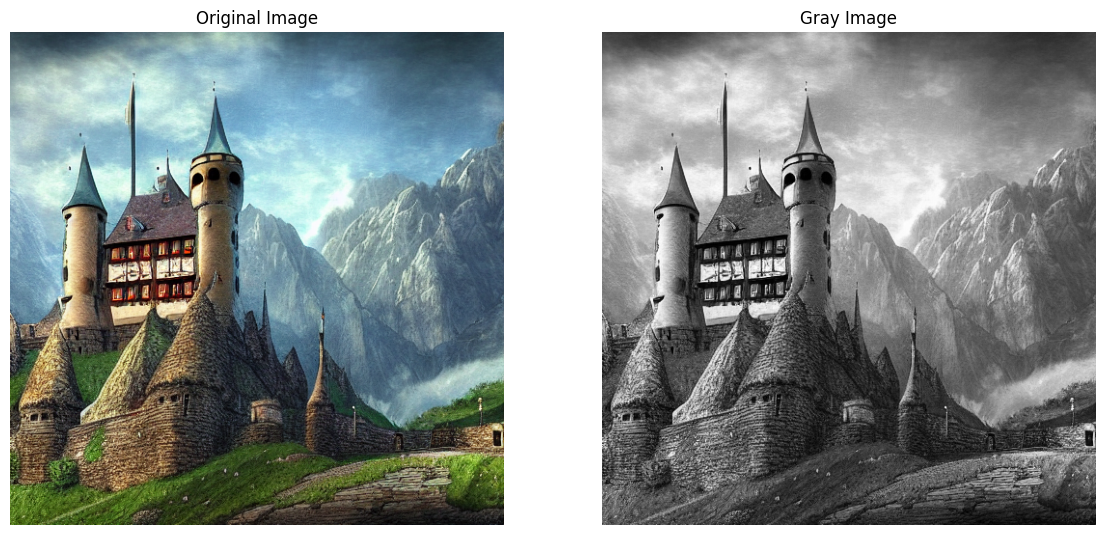

In [390]:
start = time.time()
image2gray = rgb2gray(image)
end = time.time() 
print(end - start)
show_img(image, image2gray, 'Gray')
export_img(image2gray, 'gray')

In [418]:
def rgb2sepia(image):
    img, img_max = int2float_image(image)
    sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]], dtype=float)
    sepia_img = np.dot(img, sepia_filter.T)
    sepia_img = np.clip(sepia_img, 0 , 1)
    return float2int_image(sepia_img, img_max)

0.03390955924987793


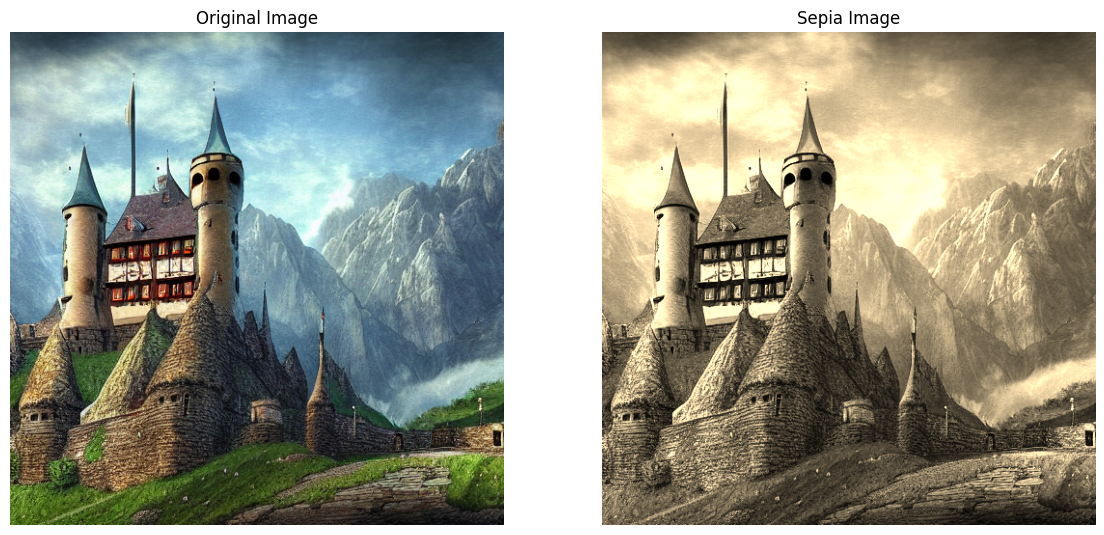

In [419]:
start = time.time()
image2sepia = rgb2sepia(image).astype(np.uint8)
end = time.time() 
print(end - start)
show_img(image, image2sepia, 'Sepia')
export_img(image2sepia, 'sepia')

In [381]:
def imagebrightness(image):
    img, img_max = int2float_image(image)
    brightness = 10 / img_max
    brighter_img = img + brightness
    brighter_img = np.clip(brighter_img, 0, 1)
    return float2int_image(brighter_img, img_max)
    

0.018932580947875977


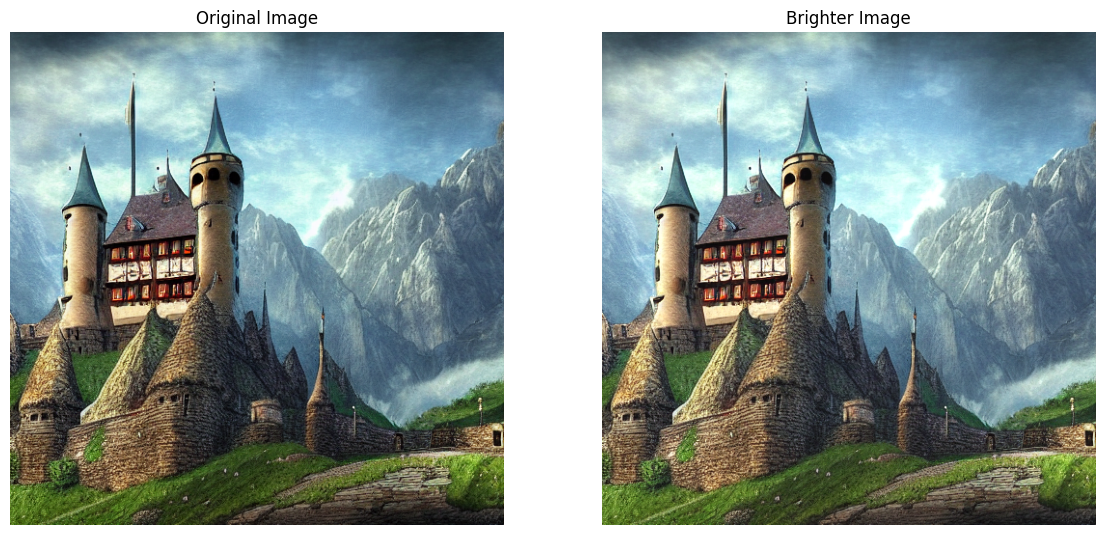

In [391]:
start = time.time()
brighter_img = imagebrightness(image).astype(np.uint8)
end = time.time() 
print(end - start)
show_img(image, brighter_img, 'Brighter')
export_img(brighter_img, 'brighter')

In [383]:
def imagecontrast(image):
    img, img_max = int2float_image(image)
    contrast = 2
    contrast_img = img * contrast
    contrast_img = np.clip(contrast_img, 0, 1)
    return float2int_image(contrast_img, img_max)

0.012964487075805664


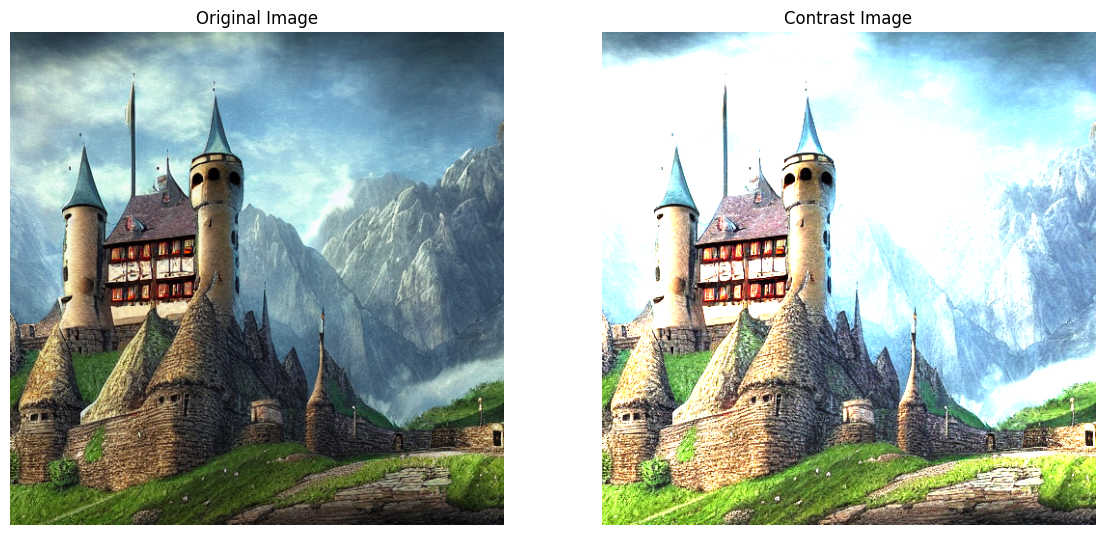

In [393]:
start = time.time()
contrast_img = imagecontrast(image).astype(np.uint8)
end = time.time() 
print(end - start)
show_img(image, contrast_img, 'Contrast')
export_img(contrast_img, 'contrast')

In [395]:
def imageblur(image):
    image, img_max = int2float_image(image)
    gaussian_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]],dtype=float) * 1/16
    blurred_img = np.zeros_like(image)
    for i in range(image.shape[2]):
        blurred_img[:, :, i] = np.real(np.fft.ifft2(np.fft.fft2(image[:, :, i]) * np.fft.fft2(gaussian_kernel, s=image[:, :, i].shape)))
    blurred_img = np.clip(blurred_img, 0, 1)
    return float2int_image(blurred_img, img_max)

0.12865567207336426


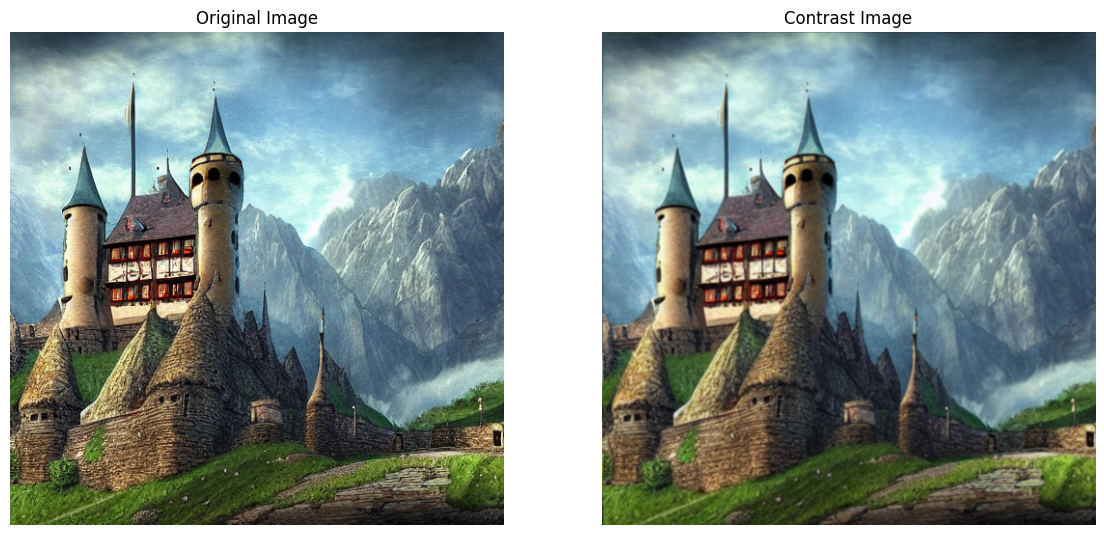

In [397]:
start = time.time()
blur_img = imageblur(image).astype(np.uint8)
end = time.time()
print(end - start)
show_img(image, blur_img, 'Contrast')
export_img(blur_img, 'blur')

In [410]:
def imagesharpen(image):
    image, img_max = int2float_image(image)
    sharpen_kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]], dtype=float)
    sharpen_img = np.zeros_like(image)
    for i in range(image.shape[2]):
        sharpen_img[:, :, i] = np.real(np.fft.ifft2(np.fft.fft2(image[:, :, i]) * np.fft.fft2(sharpen_kernel, s=image[:, :, i].shape)))
    sharpen_img = np.clip(sharpen_img, 0, 1)
    return float2int_image(sharpen_img, img_max)

0.13364124298095703


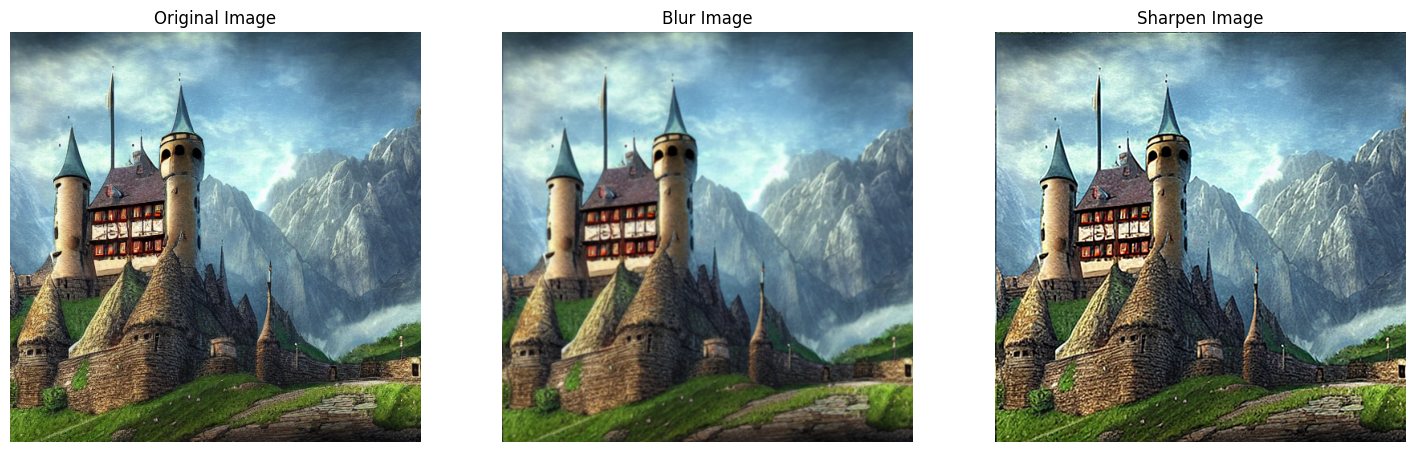

In [414]:
start = time.time()
sharpen_img = imagesharpen(blur_img).astype(np.uint8)
end = time.time()
print(end - start)
show_img(image, blur_img, 'Blur', sharpen_img, 'Sharpen')
export_img(sharpen_img, 'sharpen')